## Credit Risk Analysis | Supervised Learning ##

A Supervised Learning project that analzes historical lending activity fir a peer-to-peer lending services company to identify the creditworthiness of borrowers.

In [10]:
# Imports the data manipulation modules and basic dependencies
import numpy as np
import pandas as pd
from pathlib import Path
import dataframe_image as dfi
import matplotlib.pyplot as plt
import datapane as dp

# Imports the machine learning models
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression

# Imports the machine learning reporting modules
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn import metrics

# Imports program functionality libraries
from dotenv import load_dotenv
import os
import warnings
warnings.filterwarnings('ignore')

---

In [11]:
datapane_api_token = os.getenv("DATAPANE_API_KEY")
datapane_server_url = "https://datapane.com"
dp.login(token=datapane_api_token)


Opening login page.. Please complete login via this page and return to the terminal

If the page didn't open, use the link below
https://datapane.com/accounts/login/?signup_token=59b90349-cc45-4a50-8ef0-5a76a61bb2b7
Connected successfully to https://datapane.com as peterlieberman212@gmail.com


'peterlieberman212@gmail.com'

## Data Preparation ##

#### Step 1: Data Aggregation (Lending Data from CSV)

In [12]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data = pd.read_csv(Path("./data/lending_data.csv"))
lending_data

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


#### Step 2: Model Preparation ("Train, Test, Split")

In [13]:
# Creates the y variable (the labels)
y = lending_data["loan_status"]

# Seperates the X variable (the features)
X = lending_data.drop(columns=['loan_status'])

# Splits the data using train_test_split with a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Checks the balance of our target values to determine if oversampling is needed
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

---

#### Step 3: Sample Optimization ("Random OverSampler")

In [14]:
# Instantiates the random oversampler model with random_state parameter of 1
random_oversampler = RandomOverSampler(random_state=1)

# Fits the original training data to the random_oversampler model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train, y_train)

# Checks the resamped y values
y_resampled.value_counts()

0    56271
1    56271
Name: loan_status, dtype: int64

#### Step 4: Report Builder ("Classification Report")

In [15]:
# Function turns default classification reports into DataFrames for sharing
def get_classification_report(y_test, y_pred):
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    return df_classification_report

## Machine Learning Models ##

#### Model 1: Logistic Regression (Original Training Data)

0.95

,precision,recall,f1-score,support
0,1.00,0.99,1.00,18765.00
1,0.85,0.91,0.88,619.00
accuracy,0.99,0.99,0.99,0.99
macro avg,0.92,0.95,0.94,19384.00
weighted avg,0.99,0.99,0.99,19384.00


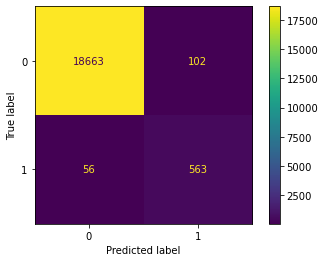

In [50]:
# Builds a LogisticRegression model with random_state parameter of 1
logistic_regression_model = LogisticRegression(random_state=1)

# Trains it on the X_train and y_train
logistic_regression_model.fit(X_train, y_train)

# Uses the trained model to predict using X_test_scaled
y_pred_original = logistic_regression_model.predict(X_test)

# Balanced Accuracy Score
accuracy_score_original = balanced_accuracy_score(y_test, y_pred_original).round(2)
display(accuracy_score_original)

# Confusion Matrix
cm_original = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_original)

# Classification Report
cr_original = get_classification_report(y_test, y_pred_original).round(2)
display(cr_original)

---

#### Model 2: Logistic Regression (Resampled Training Data)

0.99

,precision,recall,f1-score,support
0,1.00,0.99,1.00,18765.00
1,0.84,0.99,0.91,619.00
accuracy,0.99,0.99,0.99,0.99
macro avg,0.92,0.99,0.95,19384.00
weighted avg,0.99,0.99,0.99,19384.00


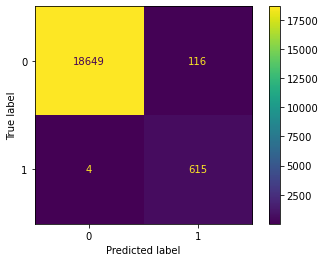

In [51]:
# Builds the Logistic Regression model with a random_state parameter of 1 to the model
model = LogisticRegression(random_state=1)

# Fits the model using the resampled training data
model.fit(X_resampled, y_resampled)

# Makes prediction using the testing data
y_pred_resampled = model.predict(X_test)

# Balanced Accuracy Score
accuracy_score_resampled = balanced_accuracy_score(y_test, y_pred_resampled).round(2)
display(accuracy_score_resampled)

# Confusion Matrix
cm_resampled = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_resampled)

# Classification Report
cr_resampled = get_classification_report(y_test, y_pred_resampled).round(2)
display(cr_resampled)

#### Results: Comparison of Models

Overall, the model using the resampled data made much more accurate predictions for the loan data across both classes. The precision scores for the `healthy loans` are virtually identical across both models, but the second model performed much better predicting the `risky loans`.

- **Model 1** predicts the `healthy loans` with 95% accuracy, 100% precision, and 99% recall, and the `risky loans` with 95% accuracy, 85% precision, and 91% recall.

- **Model 2** predicts the `healthy loans` with 99% accuracy, 100% precision, and 99% recall and the `risky loans` with 99% accuracy, 84% precision and 99% recall.

#### Datapane Integration ####

In [ ]:
# Connects to server
dp.login(token=datapane_api_token)

objc[98845]: Class WebSwapCGLLayer is implemented in both /System/Library/Frameworks/WebKit.framework/Versions/A/Frameworks/WebCore.framework/Versions/A/Frameworks/libANGLE-shared.dylib (0x7ffb4af4d948) and /Applications/Google Chrome.app/Contents/Frameworks/Google Chrome Framework.framework/Versions/102.0.5005.115/Libraries/libGLESv2.dylib (0x10b4e1290). One of the two will be used. Which one is undefined.
[0622/141939.864101:INFO:headless_shell.cc(660)] Written to file /var/folders/b1/m94z813d1ts4c217p8lxdcdr0000gn/T/tmp57irh26y/temp.png.


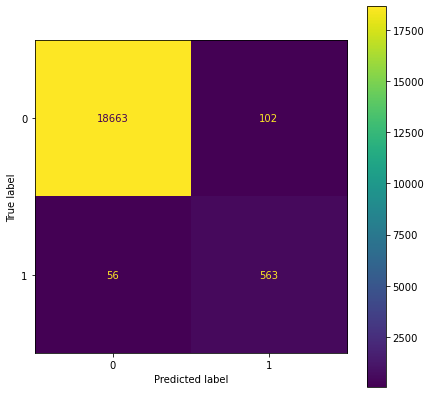

In [71]:
# Reformats and saves images for original data
fig, ax = plt.subplots(figsize=(7,7))
cm_original.plot(ax=ax)
cm_original.figure_.savefig("./images/cm_original.png", dpi=300)

dfi.export(cr_original, './images/original_classification_report.png')

# Reformats and saves images for resampled data
fig, ax = plt.subplots(figsize=(7,7))
cm_resampled.plot(ax=ax)
cm_resampled.figure_.savefig("./images/cm_resampled.png", dpi=300)

dfi.export(cr_resampled, './images/resampled_classification_report.png')

In [73]:
# Datapane report that displays models side-by-side
credit_risk  = dp.Report(
    dp.Group(
        dp.BigNumber(
             heading="Original Data: Balanced Accuracy Score", 
             value=accuracy_score_original), 
        dp.BigNumber(
             heading="Resampled Data: Balanced Accuracy Score", 
             value=accuracy_score_resampled),
        columns =2),
    dp.Group(
        dp.DataTable(cr_original), 
        dp.DataTable(cr_resampled),
        label = "Classification Report",
        columns =2),
    dp.Group(
        dp.Media(file="./images/cm_original.png", name = "originalCM", caption="Original Data"), 
        dp.Media(file="./images/cm_resampled.png", name = "resampledCM", caption="Resampled Data"),
        label = "Confusion Matrix",
        columns =2))

# report.save(path='report.html', open=True)
credit_risk.upload(name="Credit Risk Classification Report", 
        open = True, 
        description = "Logistic regression model to classify loans.",
        formatting=dp.ReportFormatting(width=dp.ReportWidth.MEDIUM))

Uploading report and associated data - *please wait...*

Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? More info <a href='https://docs.datapane.com/reports/blocks/layout-pages-and-selects' target='_blank'>here</a>

Report successfully uploaded. View and share your report <a href='https://datapane.com/reports/XkndJK3/credit-risk-classification-report/' target='_blank'>here</a>, or edit your report <a href='https://datapane.com/reports/XkndJK3/credit-risk-classification-report/edit/' target='_blank'>here</a>.

In [70]:
# Datapane report that displays models on separate tabs
credit_risk  = dp.Report(dp.Select(blocks=[
    dp.Group(
        dp.BigNumber(
             heading="Original Data: Balanced Accuracy Score", 
             value=accuracy_score_original), 
        dp.DataTable(cr_original),
        dp.Media(file="./images/cm_original.png", name = "Original", caption="Original Data: Confusion Matrix"),
       label = "Original Data"
    ),
    dp.Group(
        dp.BigNumber(
             heading="Resampled Data: Balanced Accuracy Score", 
             value=accuracy_score_resampled),
        dp.DataTable(cr_resampled),
        dp.Media(file="./images/cm_resampled.png", caption="Resampled Data: Confusion Matrix"),
        label = "Resampled Data"
    )]))

# report.save(path='report.html', open=True)
credit_risk.upload(name="Credit Risk Classification Report", 
        open = True, 
        description = "Logistic regression model to classify loans.",
        formatting=dp.ReportFormatting(width=dp.ReportWidth.MEDIUM))

Uploading report and associated data - *please wait...*

Your report only contains a single element - did you know you can include additional plots, tables and text in a single report? More info <a href='https://docs.datapane.com/reports/blocks/layout-pages-and-selects' target='_blank'>here</a>

Report successfully uploaded. View and share your report <a href='https://datapane.com/reports/qkWQNm3/credit-risk-classification-2/' target='_blank'>here</a>, or edit your report <a href='https://datapane.com/reports/qkWQNm3/credit-risk-classification-2/edit/' target='_blank'>here</a>.